# Neural Plasticity Minimal Test (v0.0.53)

This notebook tests the core tensor operations and visualizations of the neural plasticity module without loading datasets or full models.

In [1]:
import os
import sys
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set environment variables for safer execution
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'

# Add project root to path
if not os.getcwd() in sys.path:
    sys.path.append(os.getcwd())

# Import neural plasticity modules
from utils.neural_plasticity.core import calculate_head_entropy
from utils.neural_plasticity.visualization import (
    visualize_head_entropy,
    visualize_head_gradients,
    visualize_pruning_decisions,
    visualize_attention_patterns
)
from utils.colab.helpers import safe_tensor_imshow

print("Neural plasticity imports successful")

Neural plasticity imports successful


In [2]:
# Create test attention tensors
batch_size = 2
num_heads = 4
num_layers = 6
seq_len = 32

# Create random attention-like matrices
attention_maps = torch.rand(batch_size, num_heads, seq_len, seq_len)

# Ensure they sum to 1 along the last dimension (proper attention distributions)
attention_maps = attention_maps / attention_maps.sum(dim=-1, keepdim=True)

print(f"Created attention tensor of shape {attention_maps.shape}")
print(f"Attention min/max/mean: {attention_maps.min().item():.4f}/{attention_maps.max().item():.4f}/{attention_maps.mean().item():.4f}")

# Check that rows sum to 1
row_sums = attention_maps.sum(dim=-1)
print(f"Row sums close to 1.0: {torch.allclose(row_sums, torch.ones_like(row_sums))}")

Created attention tensor of shape torch.Size([2, 4, 32, 32])
Attention min/max/mean: 0.0000/0.0802/0.0312
Row sums close to 1.0: True


In [3]:
# Test entropy calculation
entropy = calculate_head_entropy(attention_maps)
print(f"Entropy shape: {entropy.shape}")
print(f"Entropy min/max/mean: {entropy.min().item():.4f}/{entropy.max().item():.4f}/{entropy.mean().item():.4f}")

# Create example layer x head entropy tensor
layer_entropies = torch.rand(num_layers, num_heads)
print(f"Layer entropies shape: {layer_entropies.shape}")

Entropy shape: torch.Size([4, 32])
Entropy min/max/mean: 3.1811/3.3318/3.2741
Layer entropies shape: torch.Size([6, 4])


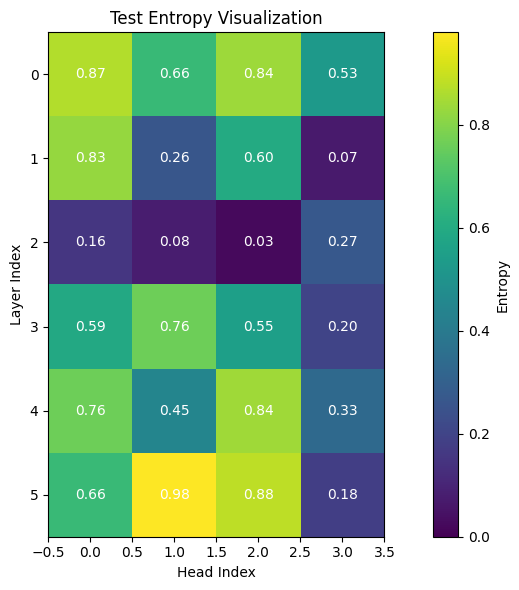

In [4]:
# Test entropy visualization
fig1 = visualize_head_entropy(
    entropy_values=layer_entropies,
    title="Test Entropy Visualization",
    annotate=True,
    figsize=(10, 6)
)

# Show the figure
plt.tight_layout()
plt.show()

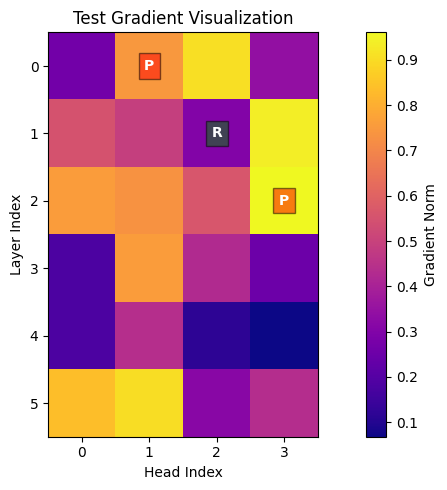

In [5]:
# Create mock gradient values
grad_values = torch.rand(num_layers, num_heads)

# Create test pruned/revived heads
pruned_heads = [(0, 1), (2, 3)]  # Layer 0, Head 1 and Layer 2, Head 3
revived_heads = [(1, 2)]         # Layer 1, Head 2

# Test gradient visualization
fig2 = visualize_head_gradients(
    grad_norm_values=grad_values,
    pruned_heads=pruned_heads,
    revived_heads=revived_heads,
    title="Test Gradient Visualization",
    figsize=(10, 5)
)

# Show the figure
plt.tight_layout()
plt.show()

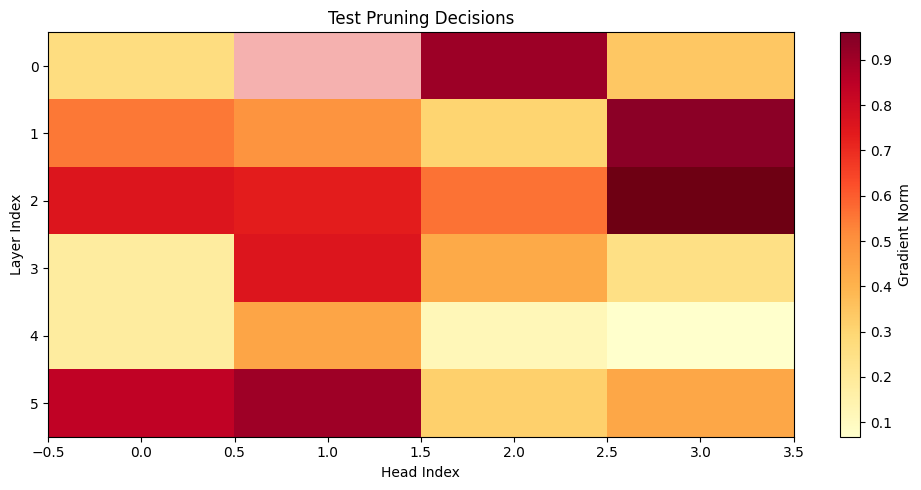

In [6]:
# Create mock pruning mask
pruning_mask = torch.zeros(num_layers, num_heads, dtype=torch.bool)
for layer, head in pruned_heads:
    pruning_mask[layer, head] = True

# Test pruning decision visualization
fig3 = visualize_pruning_decisions(
    grad_norm_values=grad_values,
    pruning_mask=pruning_mask,
    title="Test Pruning Decisions",
    figsize=(10, 5)
)

# Show the figure
plt.tight_layout()
plt.show()

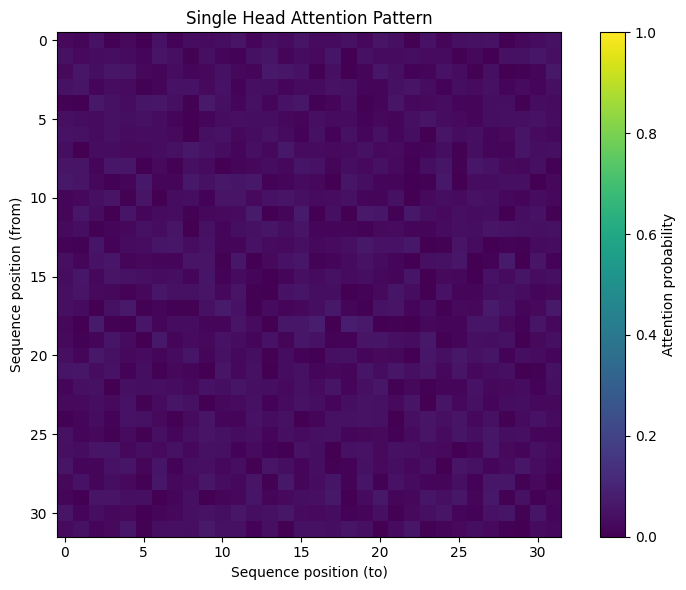

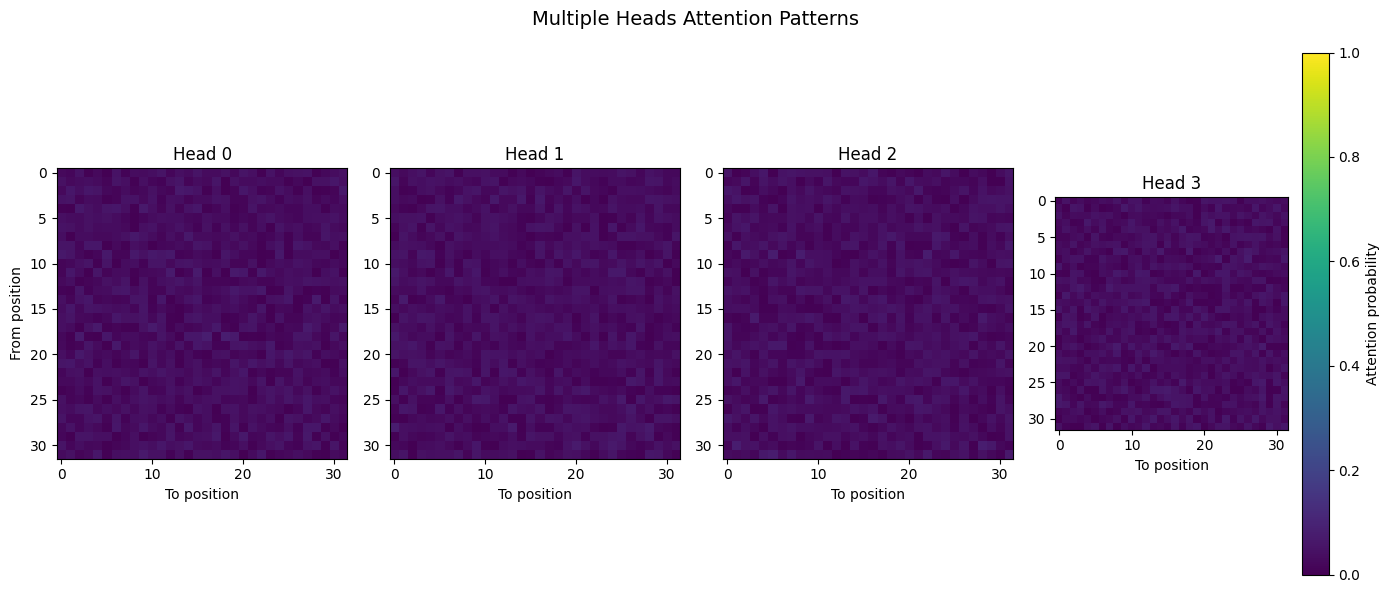

In [7]:
# Test attention pattern visualization
# For single head
fig4 = visualize_attention_patterns(
    attention_maps=attention_maps,
    layer_idx=0,
    head_idx=0,
    title="Single Head Attention Pattern",
    figsize=(8, 6)
)

# Show the figure
plt.tight_layout()
plt.show()

# For multiple heads
fig5 = visualize_attention_patterns(
    attention_maps=attention_maps,
    layer_idx=0,
    head_idx=None,  # Show multiple heads
    title="Multiple Heads Attention Patterns",
    figsize=(14, 6),
    num_heads=4
)

# Show the figure
plt.tight_layout()
plt.show()

Testing safe_tensor_imshow function...
Tensor shape: (10, 10)
Value range: [0.0016, 0.9854]
Visualization saved to: /tmp/tensor_viz_20250419_204924.png


<Figure size 800x600 with 0 Axes>

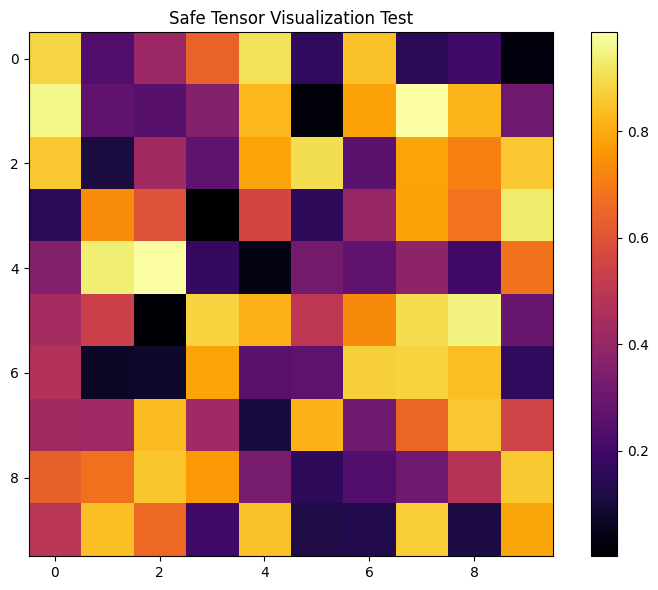

✅ Safe tensor visualization completed


In [8]:
# Test safe_tensor_imshow with both CPU and simulated GPU tensors
print("Testing safe_tensor_imshow function...")

# Create a test tensor
test_tensor = torch.rand(10, 10)

# Test with additional metadata that simulates a GPU tensor with gradients
test_tensor.requires_grad = True

# Use safe_tensor_imshow
plt.figure(figsize=(8, 6))
img = safe_tensor_imshow(
    test_tensor, 
    title="Safe Tensor Visualization Test",
    cmap="inferno"
)

plt.tight_layout()
plt.show()

print("✅ Safe tensor visualization completed")

## Test Results

If you've reached this point without errors, the neural plasticity tensor operations and visualizations are working correctly. This indicates that the fixes for BLAS/libtorch issues have been successful.

### Next Steps

1. Try running the full notebook in Colab with GPU acceleration
2. If issues persist, examine specific components as needed